In [30]:
import numpy as np
import pandas as pd

runtime = float(input("Enter the time duration you want to simulate for: "))
col = ['id', 'it', 'at', 'st', 'sb', 'se', 'wt', 'spent', 'idle']
df = pd.DataFrame(columns=col)
for m in col:
    df.loc[0,m]=0
df.loc[0, 'id'] = 1
df.loc[0, 'st'] = exp(4, 6)  # assuming that mean service time is exponentially distributed with mean 4 and max 6 
df.loc[0, 'se'] = df.loc[0, 'st']
df.loc[0, 'wt'] = df.loc[0, 'sb'] - df.loc[0, 'at']
df.loc[0, 'spent'] = df.loc[0, 'se'] - df.loc[0, 'at']
    
def exp(m, n):
    expon = np.random.exponential(scale=m)
    # Clip the numbers to be within the range (0 to n)
    clipped_number = np.clip(expon, 0, n)
    return clipped_number

i = 1
while df['se'].sum() < runtime:
        df.loc[i, 'id'] = i + 1
        df.loc[i, 'it'] = exp(5, 8)  # assuming that mean interarrival time is exponentially distributed with mean 5 and max 8
        df.loc[i, 'at'] = df.loc[i, 'it'] + df.loc[i - 1, 'at']
        df.loc[i, 'st'] = exp(4, 6)
        df.loc[i, 'sb'] = max(df.loc[i - 1, 'se'], df.loc[i, 'at'])
        df.loc[i, 'se'] = df.loc[i, 'sb'] + df.loc[i, 'st']
        df.loc[i, 'wt'] = df.loc[i, 'sb'] - df.loc[i, 'at']
        df.loc[i, 'spent'] = df.loc[i, 'se'] - df.loc[i, 'at']
        if df.loc[i - 1, 'se'] < df.loc[i, 'at']:
            df.loc[i, 'idle'] = df.loc[i, 'at'] - df.loc[i - 1, 'se']
        else:
            df.loc[i, 'idle'] = 0
        i += 1

display(df)


Enter the time duration you want to simulate for: 100


,id,it,at,st,sb,se,wt,spent,idle
0,1,0,0,1.034976,0,1.034976,0,1.034976,0
1,2,3.872024,3.872024,6.0,3.872024,9.872024,0.0,6.0,2.837049
2,3,8.0,11.872024,2.374087,11.872024,14.246111,0.0,2.374087,2.0
3,4,5.65178,17.523804,2.346256,17.523804,19.87006,0.0,2.346256,3.277693
4,5,8.0,25.523804,2.835155,25.523804,28.358959,0.0,2.835155,5.653744
5,6,2.244155,27.767959,0.399025,28.358959,28.757984,0.591,0.990025,0


In [32]:
df.shape

(6, 9)

In [33]:
waiting_time_frequency = df['wt'].value_counts()

print(waiting_time_frequency)

0.000    5
0.591    1
Name: wt, dtype: int64


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

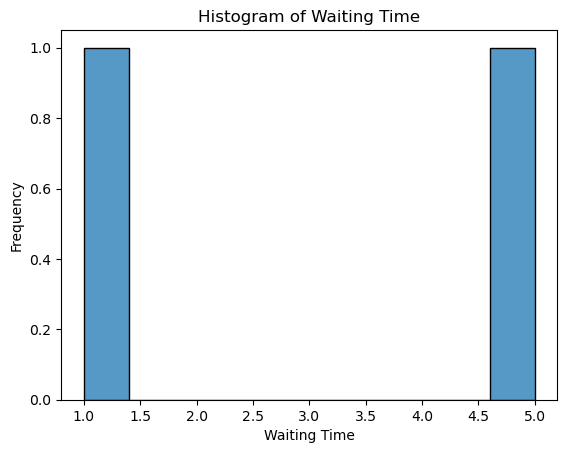

In [35]:
sns.histplot(data=waiting_time_frequency, bins=10, kde=False)
plt.xlabel('Waiting Time')
plt.ylabel('Frequency')
plt.title('Histogram of Waiting Time')
plt.show()

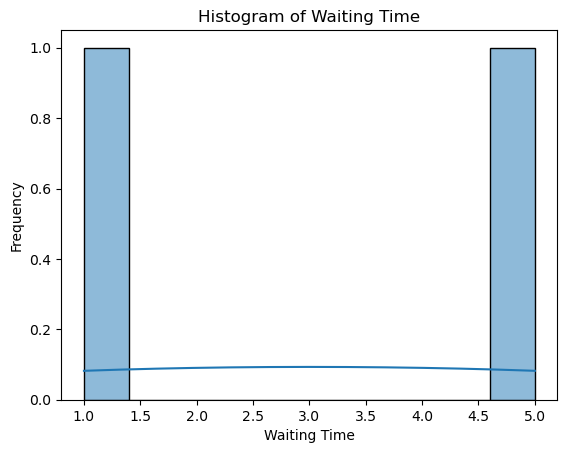

In [36]:
sns.histplot(data=waiting_time_frequency, bins=10, kde=True)
plt.xlabel('Waiting Time')
plt.ylabel('Frequency')
plt.title('Histogram of Waiting Time')
plt.show()